<a href="https://colab.research.google.com/github/JoyciP/projetoML/blob/main/Arvore_decis%C3%A3o_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primeira etapa

Se diferentes usuários têm um número significativo de autores em comum que ambos leram, você quer sugerir livros para um usuário com base nos autores que outros usuários leram e ele ainda não leu. Isso envolve a identificação de padrões entre os autores lidos por diferentes usuários para recomendar novos livros.

In [3]:
import pandas as pd

# Carregar os dados de leitura dos usuários
dados_leitura = pd.read_csv('dados_limpos_6.csv')

# Verificar a estrutura dos dados
display(dados_leitura.head())


,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,98391,034545104X,9,"morrow, georgia, usa",52,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,240144,034545104X,3,"muskego, wisconsin, usa",34,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,23768,0446520802,6,"st. louis, missouri, usa",45,The Notebook,Nicholas Sparks,1996,Warner Books
3,30711,0446520802,6,"sydney, new south wales, australia",32,The Notebook,Nicholas Sparks,1996,Warner Books
4,185233,0446520802,7,"winnemucca, nevada, usa",31,The Notebook,Nicholas Sparks,1996,Warner Books


In [4]:
import pandas as pd

# Carregar os dados de leitura dos usuários
dados_leitura = pd.read_csv('dados_limpos_6.csv')

# Verificar se há avaliações duplicadas pelo mesmo usuário
duplicatas = dados_leitura[dados_leitura.duplicated(subset=['User-ID', 'ISBN'], keep=False)]

# Exibir as linhas duplicadas (se existirem)
if duplicatas.empty:
    print("Não há avaliações duplicadas pelo mesmo usuário.")
else:
    print("Avaliações duplicadas pelo mesmo usuário encontradas:")
    display(duplicatas)


Não há avaliações duplicadas pelo mesmo usuário.


In [5]:
import pandas as pd

# Carregar os dados de leitura dos usuários
dados_leitura = pd.read_csv('dados_limpos_6.csv')

# Verificar se há avaliações duplicadas para o mesmo livro por diferentes usuários
duplicatas_dif_usuarios = dados_leitura[dados_leitura.duplicated(subset=['ISBN'], keep=False)]

# Contar o número de avaliações duplicadas para o mesmo livro por diferentes usuários
numero_duplicatas = len(duplicatas_dif_usuarios)

# Exibir a contagem de linhas duplicadas
print(f"Total de avaliações duplicadas para o mesmo livro por diferentes usuários: {numero_duplicatas}")


Total de avaliações duplicadas para o mesmo livro por diferentes usuários: 33810


In [6]:
# Criar uma matriz de usuários versus autores
matriz_usuarios_autores = pd.get_dummies(dados_leitura['Book-Author']).groupby(dados_leitura['User-ID']).max()

# Visualizar a matriz de usuários versus autores
display(matriz_usuarios_autores.head())

,D. Chiel,Mimma Balia,73 Magazine Editors,A &amp; C Black Ltd.,A A Milne,A Blue Mountain Arts Collection,A Lobo Antunes,A Rich,A. A Milne,A. A. Attanasio,...,dc Talk,e.e. cummings,f-stop Fitzgerald,herge,inc. (U.S.) Overeaters Anonymous,m Craig Barnes,s V Date,stephen R Donaldson,translated by Rumer Godden,x x
User-ID,,,,,,,,,,,,,,,,,,,,,
2033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4385,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
from sklearn.model_selection import train_test_split

# Supondo que 'dados' contém todas as informações necessárias

# Selecionar características relevantes
caracteristicas = dados_leitura[['Age', 'Book-Author']]

# Selecionar a variável de saída (Book-Rating neste caso)
perfil_usuario = dados_leitura['Book-Rating']

# Dividir os dados em conjuntos de treinamento e teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(caracteristicas, perfil_usuario, test_size=0.2, random_state=42)

# **Árvore de Decisão**

Esse código realiza o treinamento de um modelo de Árvore de Decisão para fazer previsões sobre a recomendação de livros com base nas características dos usuários (idade) e nas avaliações dos livros.

- Carrega os dados do arquivo 'dados_limpos_2.csv' para um DataFrame do pandas.

- Seleciona as características relevantes para treinar o modelo, neste caso, 'Age' (idade dos usuários) e 'Book-Rating' (avaliações dos livros).

- Define a variável alvo como 'Book-Rating', que representa a recomendação do livro.

- Divide os dados em conjuntos de treinamento (80%) e teste (20%).

- Inicializa um modelo de Árvore de Decisão.

- Treina o modelo com os dados de treinamento.

- Faz previsões utilizando os dados de teste.

- Avalia a precisão do modelo usando a função accuracy_score.

- Gera e exibe um relatório de classificação usando classification_report para detalhar precisão, recall, f1-score e suporte para cada classe.

- Cria e exibe uma matriz de confusão para visualizar as previsões corretas e erradas feitas pelo modelo.

In [8]:
# Importar as bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Carregar seus dados (substitua 'dados_limpos.csv' pelo nome do seu arquivo)
dados = pd.read_csv('dados_limpos_6.csv')

# Selecionar características relevantes (idade dos usuários e avaliações dos livros)
caracteristicas = dados[['Age', 'Book-Rating']]

# Selecionar a variável de saída (recomendação do livro)
alvo = dados['Book-Rating']

# Dividir os dados em conjuntos de treinamento e teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(caracteristicas, alvo, test_size=0.2, random_state=42)

# Inicializar o modelo de Árvore de Decisão
modelo_arvore = DecisionTreeClassifier()

# Treinar o modelo com os dados de treinamento
modelo_arvore.fit(X_train, y_train)

# Fazer previsões utilizando os dados de teste
previsoes = modelo_arvore.predict(X_test)

# Avaliar a precisão do modelo
acuracia = accuracy_score(y_test, previsoes)
relatorio_classificacao = classification_report(y_test, previsoes)
matriz_confusao = confusion_matrix(y_test, previsoes)

# Exibir métricas de avaliação
print(f'Acurácia do modelo: {acuracia}')
print('Relatório de Classificação:')
print(relatorio_classificacao)
print('Matriz de Confusão:')
print(matriz_confusao)

Acurácia do modelo: 1.0
Relatório de Classificação:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        97
           4       1.00      1.00      1.00       156
           5       1.00      1.00      1.00      1453
           6       1.00      1.00      1.00       862
           7       1.00      1.00      1.00      2098
           8       1.00      1.00      1.00      3369
           9       1.00      1.00      1.00      3014
          10       1.00      1.00      1.00      3523

    accuracy                           1.00     14665
   macro avg       1.00      1.00      1.00     14665
weighted avg       1.00      1.00      1.00     14665

Matriz de Confusão:
[[  40    0    0    0    0    0    0    0    0    0]
 [   0   53    0    0    0    0    0    0    0    0]
 [   0    0   97    0    0    0    0    0    0    0]
 [   0    

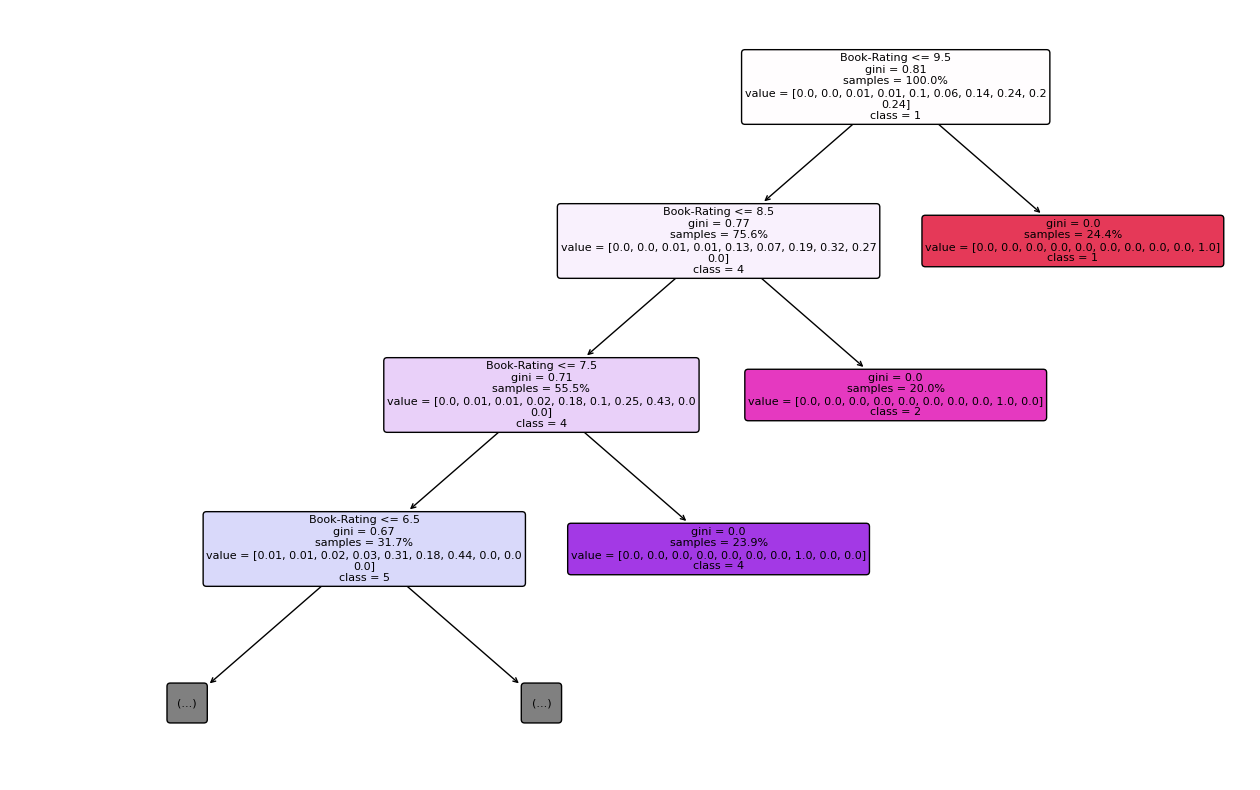

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Obter os nomes das classes
class_names = dados['Book-Rating'].unique()

# Definir o tamanho da figura e plotar a árvore com limitação de profundidade
plt.figure(figsize=(16, 10))
plot_tree(
    modelo_arvore,
    filled=True,
    feature_names=X_train.columns,
    class_names=[str(class_name) for class_name in class_names],  # Converter os nomes das classes para string
    fontsize=8,  # Tamanho da fonte
    max_depth=3,  # Profundidade máxima da árvore exibida
    precision=2,  # Precisão dos números exibidos
    label="all",  # Mostrar todos os valores de impureza
    proportion=True,  # Exibir proporção de amostras por classe
    rounded=True,  # Cantos arredondados nas caixas
)
plt.show()


In [10]:
# Obter os valores únicos de idade e suas contagens
contagem_idades = dados['Age'].value_counts()

# Ordenar os valores únicos de idade em ordem crescente
idades_unicas_ordenadas = contagem_idades.sort_index()

# Exibir os valores únicos de idade e suas contagens em ordem crescente
print("Valores únicos de idade e suas contagens (em ordem crescente):")
print(idades_unicas_ordenadas)

Valores únicos de idade e suas contagens (em ordem crescente):
14     146
17     233
18    1195
19     140
22    1303
23     621
24     686
25    1270
26    1228
27    1004
28    3352
29    3513
30    1712
31    2822
32    2946
33    3474
34    2639
35    1494
36    1930
37    2347
38    2105
39    1056
40    1140
41    1256
42    1605
43    3501
44    3020
45     751
46    2275
47    3592
48    1017
49    2671
50     885
51    1974
52    7053
53     359
54    1253
55     265
56     270
57    1169
59     101
60     472
63     837
65     297
67     239
71     106
Name: Age, dtype: int64


In [13]:
import pandas as pd

# Criar faixas etárias
faixas_etarias = pd.cut(dados['Age'], bins=[14, 20, 30, 40, 50, 60, 150], labels=['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4', 'Grupo 5', 'Grupo 6'])

# Adicionar os grupos de faixa etária ao DataFrame
dados['Faixa_Etaria'] = faixas_etarias

# Visualizar as contagens de usuários em cada faixa etária
contagem_faixa_etaria = dados['Faixa_Etaria'].value_counts()

In [17]:
display(dados.head())

dados.to_csv('dados_arvore.csv', index=False)


,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Faixa_Etaria
0,98391,034545104X,9,"morrow, georgia, usa",52,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Grupo 5
1,240144,034545104X,3,"muskego, wisconsin, usa",34,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Grupo 3
2,23768,0446520802,6,"st. louis, missouri, usa",45,The Notebook,Nicholas Sparks,1996,Warner Books,Grupo 4
3,30711,0446520802,6,"sydney, new south wales, australia",32,The Notebook,Nicholas Sparks,1996,Warner Books,Grupo 3
4,185233,0446520802,7,"winnemucca, nevada, usa",31,The Notebook,Nicholas Sparks,1996,Warner Books,Grupo 3


Etapa 2

Vamos separar um grupo de 10 autores mais lidos por Faixa_Etaria, para assim conseguirmos trabalhar com Arvore de decisão.

In [38]:
import pandas as pd

# Carregar o DataFrame com os dados modificados
dados_modificados = pd.read_csv('dados_arvore.csv')

# Criar um DataFrame relacionando a faixa etária com a idade média
relacao_idade_faixa_etaria = dados_modificados.groupby('Faixa_Etaria')['Age'].mean().reset_index()

# Exibir a relação entre a faixa etária e a idade média correspondente
display(relacao_idade_faixa_etaria)

,Faixa_Etaria,Age
0,Grupo 1,17.940689
1,Grupo 2,27.046906
2,Grupo 3,34.687970
3,Grupo 4,45.377096
4,Grupo 5,53.013781
5,Grupo 6,64.621366


In [39]:
import pandas as pd

# Carregar o DataFrame com os dados modificados
dados_modificados = pd.read_csv('dados_arvore.csv')

# Calcular a contagem de leituras de cada autor para cada grupo de faixa etária
autores_por_grupo_etario = dados_modificados.groupby(['Faixa_Etaria', 'Book-Author']).size().reset_index(name='Contagem')

# Ordenar os autores por contagem em cada grupo de faixa etária
autores_por_grupo_etario.sort_values(['Faixa_Etaria', 'Contagem'], ascending=[True, False], inplace=True)

# Selecionar os 50 autores mais lidos em cada faixa etária
autores_top_por_grupo_etario = autores_por_grupo_etario.groupby('Faixa_Etaria').head(50)

# Exibir os autores mais lidos em cada faixa etária
display(autores_top_por_grupo_etario)


,Faixa_Etaria,Book-Author,Contagem
552,Grupo 1,Nora Roberts,171
391,Grupo 1,Julie Garwood,44
385,Grupo 1,Judith McNaught,27
428,Grupo 1,LaVyrle Spencer,23
703,Grupo 1,Susan Elizabeth Phillips,23
...,...,...,...
32709,Grupo 6,John Jakes,3
32722,Grupo 6,John Updike,3
32739,Grupo 6,Joyce Carol Oates,3
32819,Grupo 6,Llewellyn,3


In [40]:
import pandas as pd

# Carregar o DataFrame com os dados modificados
dados_modificados = pd.read_csv('dados_arvore.csv')

# Calcular a contagem de leituras de cada autor para cada grupo de faixa etária
autores_por_grupo_etario = dados_modificados.groupby(['Faixa_Etaria', 'Book-Author']).size().reset_index(name='Contagem')

# Ordenar os autores por contagem em cada grupo de faixa etária
autores_por_grupo_etario.sort_values(['Faixa_Etaria', 'Contagem'], ascending=[True, False], inplace=True)

# Selecionar os 50 autores mais lidos em cada faixa etária
autores_top_por_grupo_etario = autores_por_grupo_etario.groupby('Faixa_Etaria').head(50)

# Criar um dicionário para mapear cada grupo de faixa etária ao identificador desejado
grupo_autor = {}
identificador = 100  # Identificador inicial
for grupo in autores_top_por_grupo_etario['Faixa_Etaria'].unique():
    grupo_autor[grupo] = identificador
    identificador += 100  # Incrementar o identificador

# Adicionar a coluna 'Identificador_Grupo_Autor' ao DataFrame
autores_top_por_grupo_etario['Identificador_Grupo_Autor'] = autores_top_por_grupo_etario['Faixa_Etaria'].map(grupo_autor)

# Exibir os autores mais lidos em cada faixa etária com o identificador do grupo de autor
display(autores_top_por_grupo_etario)


<ipython-input-40-4e97e6038898>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autores_top_por_grupo_etario['Identificador_Grupo_Autor'] = autores_top_por_grupo_etario['Faixa_Etaria'].map(grupo_autor)


,Faixa_Etaria,Book-Author,Contagem,Identificador_Grupo_Autor
552,Grupo 1,Nora Roberts,171,100
391,Grupo 1,Julie Garwood,44,100
385,Grupo 1,Judith McNaught,27,100
428,Grupo 1,LaVyrle Spencer,23,100
703,Grupo 1,Susan Elizabeth Phillips,23,100
...,...,...,...,...
32709,Grupo 6,John Jakes,3,600
32722,Grupo 6,John Updike,3,600
32739,Grupo 6,Joyce Carol Oates,3,600
32819,Grupo 6,Llewellyn,3,600


In [55]:
# Adicionar a coluna 'Identificador_Grupo_Autor' ao DataFrame
autores_top_por_grupo_etario['Identificador_Grupo_Autor'] = autores_top_por_grupo_etario['Faixa_Etaria'].map(grupo_autor)

# Exibir os autores mais lidos em cada faixa etária com o identificador do grupo de autor
#display(autores_top_por_grupo_etario)

# Salvar o DataFrame atualizado em um novo arquivo CSV
# autores_top_por_grupo_etario.to_csv('autores_top_por_grupo_etario.csv', index=False)


<ipython-input-55-2c766503857b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autores_top_por_grupo_etario['Identificador_Grupo_Autor'] = autores_top_por_grupo_etario['Faixa_Etaria'].map(grupo_autor)


,Faixa_Etaria,Book-Author,Contagem,Identificador_Grupo_Autor
552,Grupo 1,Nora Roberts,171,100
391,Grupo 1,Julie Garwood,44,100
385,Grupo 1,Judith McNaught,27,100
428,Grupo 1,LaVyrle Spencer,23,100
703,Grupo 1,Susan Elizabeth Phillips,23,100
...,...,...,...,...
32709,Grupo 6,John Jakes,3,600
32722,Grupo 6,John Updike,3,600
32739,Grupo 6,Joyce Carol Oates,3,600
32819,Grupo 6,Llewellyn,3,600


In [46]:
import pandas as pd

# Carregar o DataFrame com os dados originais
dados_arvore = pd.read_csv('dados_arvore.csv')

# Adicionar a coluna 'Identificador_Grupo_Autor' ao DataFrame
dados_arvore['Identificador_Grupo_Autor'] = dados_arvore['Faixa_Etaria'].map(grupo_autor)

display(dados_arvore.head())
# Salvar o DataFrame atualizado no mesmo arquivo CSV
dados_arvore.to_csv('dados_arvore_2.csv', index=False)


,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Faixa_Etaria,Identificador_Grupo_Autor
0,98391,034545104X,9,"morrow, georgia, usa",52,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Grupo 5,500.0
1,240144,034545104X,3,"muskego, wisconsin, usa",34,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Grupo 3,300.0
2,23768,0446520802,6,"st. louis, missouri, usa",45,The Notebook,Nicholas Sparks,1996,Warner Books,Grupo 4,400.0
3,30711,0446520802,6,"sydney, new south wales, australia",32,The Notebook,Nicholas Sparks,1996,Warner Books,Grupo 3,300.0
4,185233,0446520802,7,"winnemucca, nevada, usa",31,The Notebook,Nicholas Sparks,1996,Warner Books,Grupo 3,300.0


In [59]:
import pandas as pd

dados_arvore_2 = pd.read_csv('dados_arvore_2.csv')
display(dados_arvore_2.head())

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Faixa_Etaria,Identificador_Grupo_Autor
0,98391,034545104X,9,"morrow, georgia, usa",52,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Grupo 5,500.0
1,240144,034545104X,3,"muskego, wisconsin, usa",34,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Grupo 3,300.0
2,23768,0446520802,6,"st. louis, missouri, usa",45,The Notebook,Nicholas Sparks,1996,Warner Books,Grupo 4,400.0
3,30711,0446520802,6,"sydney, new south wales, australia",32,The Notebook,Nicholas Sparks,1996,Warner Books,Grupo 3,300.0
4,185233,0446520802,7,"winnemucca, nevada, usa",31,The Notebook,Nicholas Sparks,1996,Warner Books,Grupo 3,300.0


In [64]:
import pandas as pd

# Carregar o DataFrame com os dados
dados_arvore = pd.read_csv('dados_arvore_2.csv')

# Mapear os valores da coluna Faixa_Etaria para 1, 2, 3, ...
mapeamento = {
    'Grupo 1': 1,
    'Grupo 2': 2,
    'Grupo 3': 3,
    'Grupo 4': 4,
    'Grupo 5': 5,
    'Grupo 6': 6
}

# Substituir os valores de 'Faixa_Etaria' de acordo com o mapeamento
dados_arvore['Faixa_Etaria'] = dados_arvore['Faixa_Etaria'].replace(mapeamento)

# Calcular a contagem de leituras de cada autor para cada grupo de faixa etária
autores_por_grupo_etario = dados_arvore.groupby(['Faixa_Etaria', 'Book-Author']).size().reset_index(name='Contagem')

# Ordenar os autores por contagem em cada grupo de faixa etária
autores_por_grupo_etario.sort_values(['Faixa_Etaria', 'Contagem'], ascending=[True, False], inplace=True)

# Selecionar os 50 autores mais lidos em cada faixa etária
autores_top_por_grupo_etario = autores_por_grupo_etario.groupby('Faixa_Etaria').head(50)

# Criar um dicionário para mapear cada grupo de faixa etária ao identificador desejado
grupo_autor = {}
identificador = 100  # Identificador inicial
for grupo in autores_top_por_grupo_etario['Faixa_Etaria'].unique():
    grupo_autor[grupo] = identificador
    identificador += 100  # Incrementar o identificador

# Adicionar a coluna 'Identificador_Grupo_Autor' ao DataFrame
autores_top_por_grupo_etario['Identificador_Grupo_Autor'] = autores_top_por_grupo_etario['Faixa_Etaria'].map(grupo_autor)

# Adicionar a coluna 'Identificador_Grupo_Autor' ao DataFrame
dados_arvore['Identificador_Grupo_Autor'] = dados_arvore['Faixa_Etaria'].map(grupo_autor)

# Exibir as primeiras linhas do DataFrame para verificar as alterações
display(dados_arvore.head())

# Salvar o DataFrame atualizado no mesmo arquivo CSV
dados_arvore.to_csv('dados_arvore_5.csv', index=False)

<ipython-input-64-1805192feb9c>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autores_top_por_grupo_etario['Identificador_Grupo_Autor'] = autores_top_por_grupo_etario['Faixa_Etaria'].map(grupo_autor)


,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Faixa_Etaria,Identificador_Grupo_Autor
0,98391,034545104X,9,"morrow, georgia, usa",52,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,5.0,500.0
1,240144,034545104X,3,"muskego, wisconsin, usa",34,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,3.0,300.0
2,23768,0446520802,6,"st. louis, missouri, usa",45,The Notebook,Nicholas Sparks,1996,Warner Books,4.0,400.0
3,30711,0446520802,6,"sydney, new south wales, australia",32,The Notebook,Nicholas Sparks,1996,Warner Books,3.0,300.0
4,185233,0446520802,7,"winnemucca, nevada, usa",31,The Notebook,Nicholas Sparks,1996,Warner Books,3.0,300.0


In [67]:
import pandas as pd

# Carregar o DataFrame com os dados
dados_arvore = pd.read_csv('dados_arvore_5.csv')

# Excluir linhas com valores NaN
dados_arvore = dados_arvore.dropna()

# Verificar as primeiras linhas do DataFrame após a exclusão dos NaN
display(dados_arvore.head())

dados_arvore.to_csv('dados_arvore_6.csv', index=False)

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Faixa_Etaria,Identificador_Grupo_Autor
0,98391,034545104X,9,"morrow, georgia, usa",52,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,5.0,500.0
1,240144,034545104X,3,"muskego, wisconsin, usa",34,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,3.0,300.0
2,23768,0446520802,6,"st. louis, missouri, usa",45,The Notebook,Nicholas Sparks,1996,Warner Books,4.0,400.0
3,30711,0446520802,6,"sydney, new south wales, australia",32,The Notebook,Nicholas Sparks,1996,Warner Books,3.0,300.0
4,185233,0446520802,7,"winnemucca, nevada, usa",31,The Notebook,Nicholas Sparks,1996,Warner Books,3.0,300.0


In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Carregar o DataFrame com os dados
dados_arvore = pd.read_csv('dados_arvore_6.csv')

# Selecionar características relevantes (faixa etária)
caracteristicas = dados_arvore[['Faixa_Etaria']]

# Selecionar a variável de saída (identificador do grupo autor)
perfil_usuario = dados_arvore['Identificador_Grupo_Autor']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(caracteristicas, perfil_usuario, test_size=0.2, random_state=42)

# Inicializar o modelo de Árvore de Decisão
modelo_arvore = DecisionTreeClassifier()

# Treinar o modelo com os dados de treinamento
modelo_arvore.fit(X_train, y_train)

# Fazer previsões utilizando os dados de teste
previsoes = modelo_arvore.predict(X_test)

# Avaliar a precisão do modelo
acuracia = accuracy_score(y_test, previsoes)
relatorio_classificacao = classification_report(y_test, previsoes)
matriz_confusao = confusion_matrix(y_test, previsoes)

# Exibir métricas de avaliação
print(f'Acurácia do modelo: {acuracia}')
print('Relatório de Classificação:')
print(relatorio_classificacao)
print('Matriz de Confusão:')
print(matriz_confusao)


Acurácia do modelo: 1.0
Relatório de Classificação:
              precision    recall  f1-score   support

       100.0       1.00      1.00      1.00       335
       200.0       1.00      1.00      1.00      2905
       300.0       1.00      1.00      1.00      4375
       400.0       1.00      1.00      1.00      4159
       500.0       1.00      1.00      1.00      2581
       600.0       1.00      1.00      1.00       281

    accuracy                           1.00     14636
   macro avg       1.00      1.00      1.00     14636
weighted avg       1.00      1.00      1.00     14636

Matriz de Confusão:
[[ 335    0    0    0    0    0]
 [   0 2905    0    0    0    0]
 [   0    0 4375    0    0    0]
 [   0    0    0 4159    0    0]
 [   0    0    0    0 2581    0]
 [   0    0    0    0    0  281]]


## **Distribuição de Previsões**


<ipython-input-70-40dd04f5219d>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(previsoes, label='Previsões', shade=True)
<ipython-input-70-40dd04f5219d>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label='Rótulos Reais', shade=True)


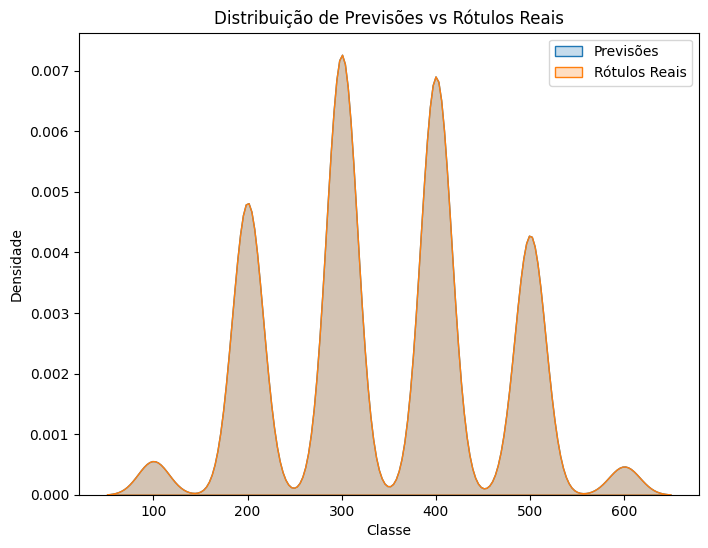

In [70]:
import seaborn as sns

# Plot da distribuição das previsões e rótulos reais
plt.figure(figsize=(8, 6))
sns.kdeplot(previsoes, label='Previsões', shade=True)
sns.kdeplot(y_test, label='Rótulos Reais', shade=True)
plt.title('Distribuição de Previsões vs Rótulos Reais')
plt.xlabel('Classe')
plt.ylabel('Densidade')
plt.legend()
plt.show()



# **Árvore de Decisão**

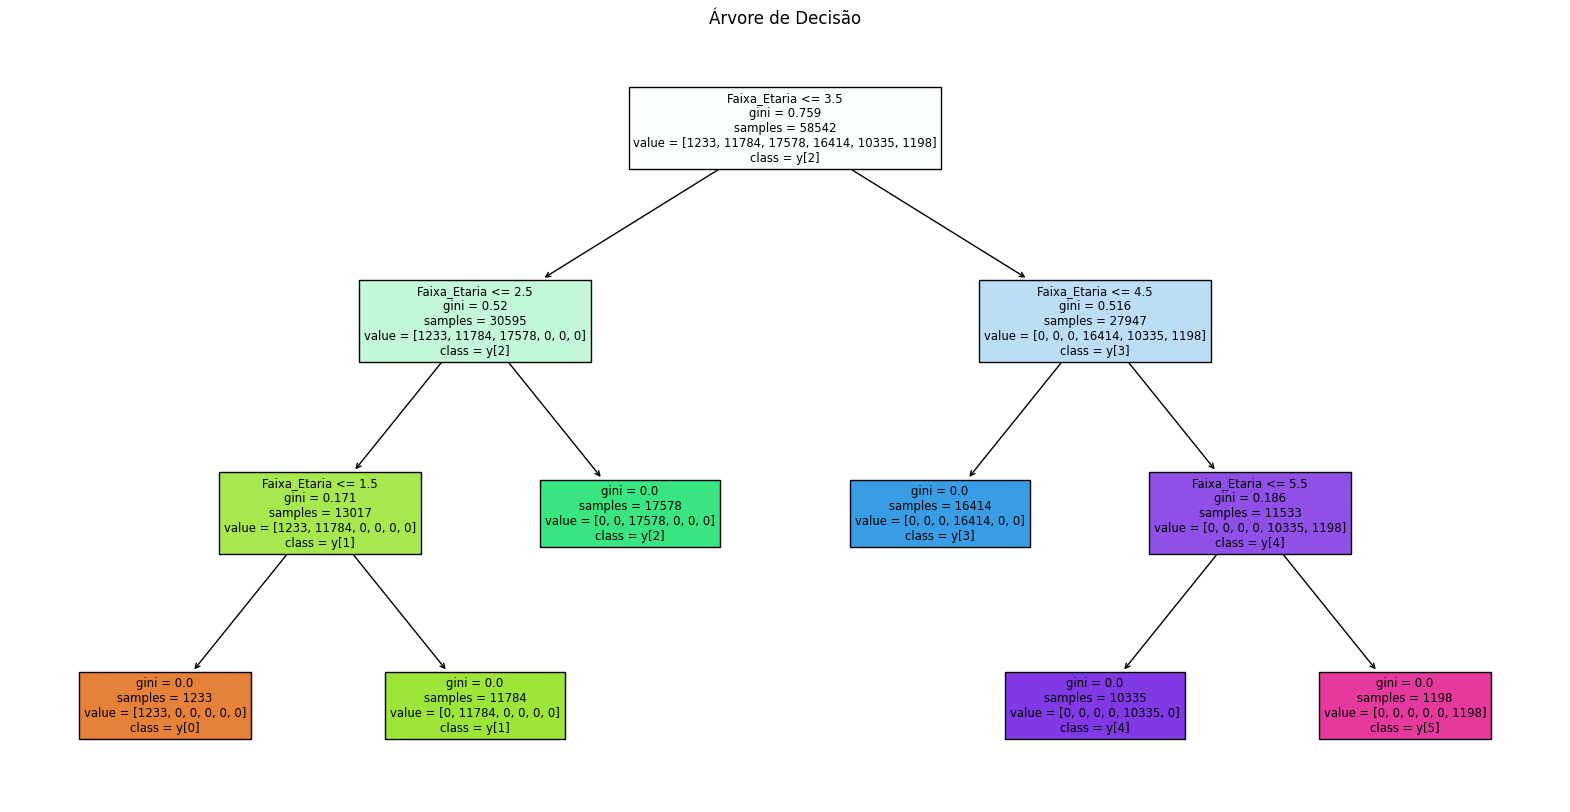

In [71]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Criar o modelo de árvore de decisão (se ainda não tiver sido criado)
# modelo_arvore = DecisionTreeClassifier()

# Treinar o modelo com os dados de treinamento (se ainda não tiver sido treinado)
# modelo_arvore.fit(X_train, y_train)

# Plotar a árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(modelo_arvore, filled=True, feature_names=caracteristicas.columns, class_names=True)
plt.title('Árvore de Decisão')
plt.show()


Cada nó (quadradinho) na árvore de decisão tem várias informações associadas. Vamos analisar as principais linhas que você forneceu:

1. **`Faixa_Etaria <= 3.5`**: Esta linha indica a condição para a divisão no nó. Neste caso, se o valor da característica `Faixa_Etaria` for menor ou igual a 3.5, o fluxo seguirá para o nó à esquerda; caso contrário, seguirá para o nó à direita.

2. **`gini = 0.759`**: O índice de Gini é uma medida de impureza. Quanto mais próximo de zero, mais puro é o nó. Um valor alto, como 0.759, sugere um nó relativamente impuro.

3. **`samples = 58542`**: Indica o número total de amostras no nó.

4. **`value [1233, 11784, 17558]`**: Este valor representa a distribuição das classes no nó. No seu caso, são três classes, e o vetor `[1233, 11784, 17558]` indica quantas amostras pertencem a cada classe.

5. **`class = y[2]`**: Indica a classe prevista para o nó. Neste exemplo, parece ser a terceira classe (índice 2, considerando que a indexação geralmente começa do zero).

Em resumo, a árvore de decisão está usando a característica `Faixa_Etaria` para fazer divisões e, em cada nó, está tentando criar grupos mais homogêneos em termos de classes. O Gini é usado para medir o quão misturadas estão as classes em um determinado nó.